In [3]:
# using one-class-SVM with RBF non-linear kernel for outlier detection

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.svm import OneClassSVM
from numpy import where

cali_houses = fetch_california_housing()
X = cali_houses.data
y = cali_houses.target

df_X= pd.DataFrame(X , columns = cali_houses.feature_names)
df_y = pd.DataFrame(y , columns = cali_houses.target_names)
df = pd.concat([df_X , df_y] , axis=1)
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<ipython-input-4-4b14778b2007>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["MedInc"] = np.log((Data["MedInc"] + 0.1).astype(float))
<ipython-input-4-4b14778b2007>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Population"] = np.log((Data["Population"] + 0.1).astype(float))


OneClassSVM(gamma=0.001, nu=0.03)


Text(0, 0.5, 'Population')

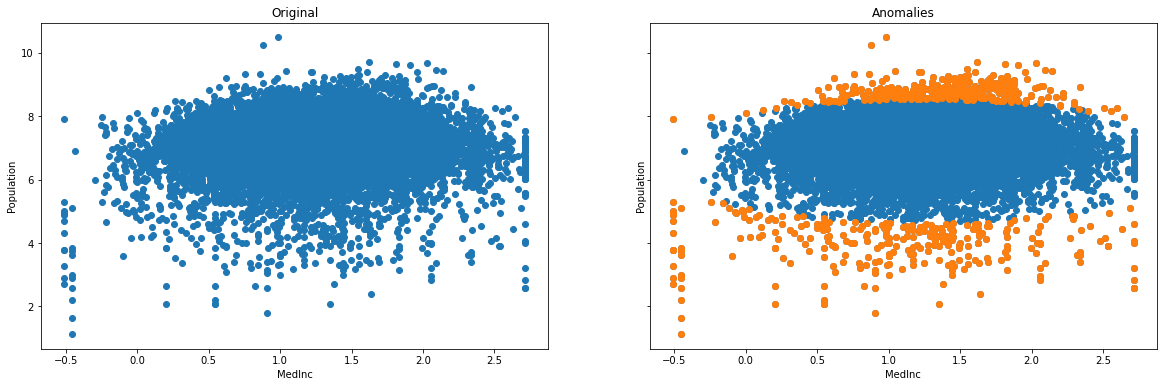

In [4]:
import matplotlib.pyplot as plt

relevant_features = ["MedInc","Population"]

Data = df[relevant_features]
# Normalize data
Data["MedInc"] = np.log((Data["MedInc"] + 0.1).astype(float)) 
Data["Population"] = np.log((Data["Population"] + 0.1).astype(float)) 


# display(Data)
# Converting Data Frame to a 2D array
input = Data.to_numpy()
#print(type(input))

# Training one-class-svm with input data: 

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

# fit method fits the model on the training data
svm.fit(input)
# predict method performs predictions on testing instances based on the learned parameters during fit. 
pred = svm.predict(input)

# ----------------- The model has been trained and tested on input data. 
#display(pred)
# Extracting the negative outputs as outliers 
anom_index = where(pred==-1)
#print(anom_index)
values = input[anom_index]

# Visualizing the results in a plot by showing the ground truth (original data) and highlighting the anomalies with a color.
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(Data["MedInc"], Data["Population"], cmap='rainbow')
ax0.set_xlabel('MedInc')
ax0.set_ylabel('Population')

# Anomalies
ax1.set_title('Anomalies')
ax1.scatter(input[:,0], input[:,1])
ax1.scatter(values[:,0], values[:,1], cmap='rainbow')
ax1.set_xlabel('MedInc')
ax1.set_ylabel('Population')

